In [193]:
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn.datasets import load_wine


# Wine Dataset

In [2]:
samples, labels = load_wine(return_X_y=True)
samples = samples.T # use the same features, samples structure as usual


# Standardization of Data

In [3]:
sample_mean = np.mean(samples, axis=1)
sample_mean = np.reshape(sample_mean, (len(sample_mean), 1))
samples_centered = samples - sample_mean


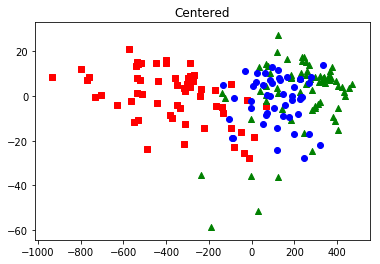

In [4]:
U, Sigma, V = np.linalg.svd(samples_centered)
U2 = U[:, :2]
samples_pca = U2.T @ samples_centered

plt.figure()
for sample, label in zip(samples_pca.T, labels):
#     print(sample)
    color = 'r'
    marker = 's'
    if label == 1:
        color = 'g'
        marker = '^'
    elif label == 2:
        color = 'b'
        marker = 'o'
    plt.scatter(*sample, c=color, marker=marker)
plt.title('Centered')
plt.show()
    

In [8]:
sample_variance = np.var(samples_centered, axis=1)
sample_variance = np.reshape(sample_variance, (len(sample_variance), 1))
print(samples_centered.shape, np.sqrt(sample_variance).shape)
samples_norm = samples_centered / np.sqrt(sample_variance)


(13, 178) (13, 1)


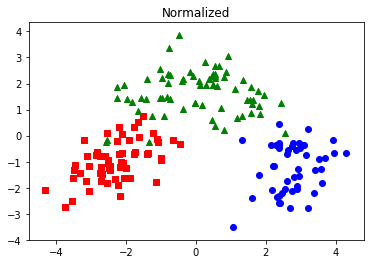

In [9]:
Un, Sigman, Vn = np.linalg.svd(samples_norm)
U2n = Un[:, :2]
samples_norm_pca = U2n.T @ samples_norm

plt.figure()
for sample, label in zip(samples_norm_pca.T, labels):
    color = 'r'
    marker = 's'
    if label == 1:
        color = 'g'
        marker = '^'
    elif label == 2:
        color = 'b'
        marker = 'o'
    plt.scatter(*sample, c=color, marker=marker)
plt.title('Normalized')
plt.show()


# Naive Bayes

In [202]:
def train_nb(train_data, labels):
    n_labels = len(set(labels))
    n_features = len(train_data)
    means = np.zeros((n_labels, n_features))
    variances = np.zeros((n_labels, n_features))
    for label in range(n_labels):
        train_data_part = np.array([n for l, n in zip(labels, train_data.T) if l == label])
        means[label] = np.mean(train_data_part, axis=0)
#         print(np.mean(train_data_part - means[label], axis=0))
        variances[label] = np.var(train_data_part, axis=0)
#         print(np.var((train_data_part - means[label])/np.sqrt(variances[label]), axis=0))
    print(means)
    print(variances)
    return means, variances

def test_nb(test_data, means, variances, labels):
    probs = np.zeros((len(means), len(test_data)))
    for i, (m, v) in enumerate(zip(means, variances)):
        m = np.reshape(m, (len(m), 1))
        v = np.reshape(v, (len(v), 1))
        probs[i] = np.multiply.reduce(np.exp(-(test_data-m)**2/v/2)/np.sqrt(2*math.pi*v))
    return np.argmax(np.array(probs), axis=0)


In [203]:
means, variances = train_nb(samples_pca, labels)
pred_labels = test_nb(samples_pca, means, variances, labels)
print(pred_labels)


[[-3.68887863e+02  1.94496661e-02]
 [ 2.27447528e+02  1.16028790e+00]
 [ 1.16991863e+02 -1.74016607e+00]]
[[48212.29594953   135.86100816]
 [24405.24113376   238.04672039]
 [12975.47164561   112.097201  ]]
(178,)
[1.10325211e-05 5.35219936e-05 5.06107260e-05 1.56930304e-05
 3.92796483e-06 1.95010491e-05 2.32236202e-05 2.74358504e-05
 4.61999931e-05 4.90826396e-05 9.62345064e-06 2.22376260e-05
 7.98860305e-06 2.37161482e-05 5.27737716e-06 4.12645928e-05
 3.05184675e-05 4.75733306e-05 1.77331417e-06 1.35578781e-05
 1.74145316e-06 1.77790174e-05 5.48827675e-05 3.99968895e-05
 2.60198370e-05 3.87151472e-06 2.60921975e-05 1.93857996e-05
 3.82917655e-05 4.32992796e-05 3.61035912e-05 9.75726947e-06
 5.27790928e-05 6.91994327e-06 5.82717651e-05 4.06175281e-05
 2.79666695e-05 4.86739760e-05 4.79128507e-05 9.64196681e-07
 8.02326408e-06 2.57593073e-05 5.64163343e-05 8.08480758e-06
 3.29608391e-05 5.52610635e-05 5.79247782e-05 5.03466659e-05
 5.90655647e-05 4.99770369e-05 2.67440999e-05 2.1630987